IX: Auswertung
===

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
from scipy.stats import chi2

1 Bestimmung der Zeitkonstante des RC-Glieds
----

In [3]:
# Tabelle 1
C_1 = np.array([47, 470, 4.7]) # 10^-9 F
sig_C_1 = 0.1 * C_1
R_1 = np.array([1, 1, 10]) # 10^3 Ohm
sig_R_1 = 0.05 * R_1
T_12_1 = np.array([43, 380, 42]) # 10^-6 s
sig_T_12_1 = np.array([1, 10, 1]) # 10^-6 s

T_12_vert = 42 # 10^-6 s
sig_T_12_vert = 1 

# Experimentelle Zeitkonstante:
tau_1 = T_12_1 / log(2)
sig_tau_1 = sig_T_12_1 / log(2)

# Theoretische Zeitkonstante:
tau_theo_1 = C_1 * R_1
sig_tau_theo_1 = sqrt( (sig_C_1 * R_1) ** 2 + (C_1 * sig_R_1) ** 2)

print('Experimentelle Zeitkonstante:')
print('tau_exp =', np.round(tau_1,1))
print('      +/-', np.round(sig_tau_1,1))
print('Theoretische Zeitkonstante:')
print('tau_theo =', tau_theo_1)
print('       +/-', np.round(sig_tau_theo_1,0))

Experimentelle Zeitkonstante:
tau_exp = [ 62.  548.2  60.6]
      +/- [ 1.4 14.4  1.4]
Theoretische Zeitkonstante:
tau_theo = [ 47. 470.  47.]
       +/- [ 5. 53.  5.]


3 Frequenz- und Phasengang eines RC-Glieds
---

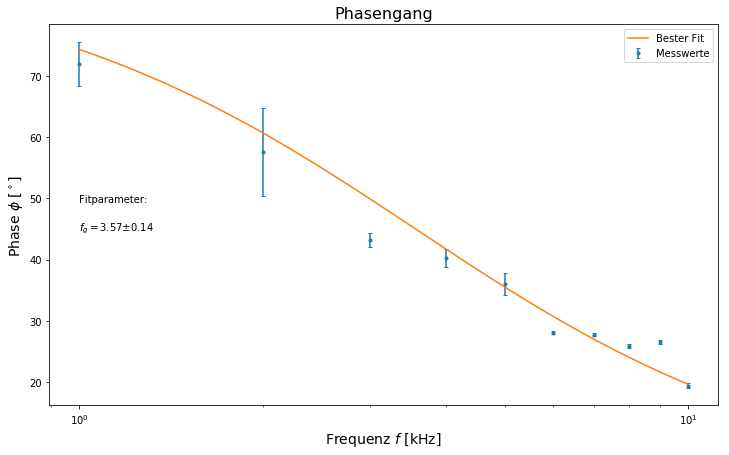

In [4]:
# Tabelle 2
f_2 = np.arange(1,11,1) # 10^3 Hz
D_t_2 = np.array([200, 80, 40, 28, 20, 13, 11, 9, 8.2, 5.4])
sig_D_t_2 = np.array([10, 10, 1, 1, 1, 0.1, 0.1, 0.1, 0.1, 0.1])
phi_2 = 360 * f_2 * D_t_2 / 1000
sig_phi_2 = 360 * f_2 * sig_D_t_2 / 1000

# Fit
def arctan(f, f_g):
    return np.arctan(f_g / f) * (360 / (2 * np.pi)) # f_g ist Grenzfrequenz

popt, pcov = curve_fit(arctan, f_2, phi_2, sigma = sig_phi_2)
x = np.arange(1,10,0.01)

# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(f_2, phi_2, yerr = sig_phi_2, fmt = '.', capsize = 2, 
             label = 'Messwerte')
plt.plot(x, arctan(x, *popt), label = 'Bester Fit')
plt.title('Phasengang', size = 16)
plt.xlabel('Frequenz $f$ [kHz]', size = 14)
plt.ylabel('Phase $\\phi$ [$^\circ$]', size = 14)
plt.text(1, exp(3.9), 'Fitparameter:')
plt.text(1, exp(3.8), '$f_g =$' + str(np.round(popt[0],2)) 
         + '$\pm$' + str(np.round(sqrt(pcov[0,0]),2)))
plt.xscale('log')

plt.legend(loc ='best')
plt.savefig('images/241/V241Diagramm1.png')
plt.show()

In [5]:
fg = popt[0]
sig_fg = sqrt(pcov[0,0])
print('Grenzfrequenz f_g =',np.round(fg,2), '+/-', np.round(sig_fg,2))

Grenzfrequenz f_g = 3.57 +/- 0.14


In [6]:
# Güte des Fits
chi2_= np.sum((arctan(f_2, *popt) - phi_2) ** 2 / sig_phi_2 ** 2) 
dof = len(phi_2) - 1 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 475.8161605269691
chi2_red = 52.868462280774345
Wahrscheinlichkeit = 0.0 %


In [7]:
# Güte des Fits Muster
#chi2_= np.sum((fit_func(x, *popt) - y) ** 2 / sig_y ** 2) 
#dof = len(y) - n #dof:degrees of freedom, Freiheitsgrad 
#chi2_red = chi2_/dof

#print("chi2 =", chi2_)
#print("chi2_red =",chi2_red)

#prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
#print("Wahrscheinlichkeit =", prob, "%")

4 Frequenzgang eines Serienschwingkreises
---

Induktivität

In [8]:
R_4 = np.array([1000, 220, 47]) # Ohm
sig_R_4 = 0.05 * R_4
f_R_4 = np.array([3.93, 3.75, 3.73]) # kHz
sig_f_R_4 = 0.1 * np.ones(3)
Delta_f = np.array([4.76, 1.33, 0.67]) # kHz
sig_Delta_f = np.array([0.2, 0.1, 0.05])
C_4 = 47 # nF
sig_C_4 = 5

L = 1e3 / ((2 * np.pi * f_R_4) ** 2 * C_4) # H
sig_L = 1e3 / (2 * np.pi) ** 2 * sqrt((sig_f_R_4 / (f_R_4 ** 3 * C_4)) ** 2 
                                    + (sig_C_4 / (f_R_4 ** 2 * C_4 ** 2)) ** 2)
L_mean = np.mean(L)
sig_L_mean = 1 / sqrt(3) * np.std(L)

print('Induktivität:')
print('L =', np.round(L,3))
print('+/-', np.round(sig_L,3))
print('L_mean =', np.round(L_mean,9), '+/-', np.round(sig_L_mean,9))

Induktivität:
L = [0.035 0.038 0.039]
+/- [0.004 0.004 0.004]
L_mean = 0.037318738 +/- 0.000994435


Verlustwiderstand

In [9]:
# Mit Bandbreite und Induktivität
RR_V = 2 * np.pi * Delta_f * L * 1e3 # Ohm
R_V = RR_V - R_4
sig_RR_V = sqrt( (2 * np.pi * sig_Delta_f * L) ** 2 
                + (2 * np.pi * Delta_f * sig_L) ** 2 ) * 1e3 
sig_R_V = sqrt(sig_RR_V ** 2 + sig_R_4 ** 2)

print('Gesamtwiderstand:')
print('R + R_V =', np.round(RR_V,0))
print('      +/-', np.round(sig_RR_V,0))
print('Verlustwiderstand:') 
print('R_V =', np.round(R_V,-1))
print('  +/-', np.round(sig_R_V,-1))

Gesamtwiderstand:
R + R_V = [1044.  320.  163.]
      +/- [122.  43.  22.]
Verlustwiderstand:
R_V = [ 40. 100. 120.]
  +/- [130.  40.  20.]


In [10]:
# Mit Eingang- und Ausgangsspannung
U_A = np.array([0.94, 0.73, 0.33]) # V
U_E = 1 # V

R_V_2 = R_4 * (U_E / U_A - 1)
sig_R_V_2 = sqrt( (sig_R_4 * (U_E / U_A - 1)) ** 2 )
print('Verlustwiderstand:')
print('R_V =', np.round(R_V_2,0))
print('  +/-', np.round(sig_R_V_2,0))

Verlustwiderstand:
R_V = [64. 81. 95.]
  +/- [3. 4. 5.]


5 Bestimmung der Dämpfungskonstante
----

In [11]:
# Induktivität
C_5 = 47 #nF
sig_C_5 = 5
w_R = 2 * np.pi * f_R_4[2] # Grenzfrequenz aus 4
sig_w_R = 2 * np.pi * sig_f_R_4[2]

L_5 = 1 / (w_R ** 2 * C_5) * 1e3
sig_L_5 = 1e3 * sqrt( (2 * sig_w_R / ((w_R ** 3) * C_5)) ** 2 + (sig_C_5 / (w_R ** 2 * C_5 ** 2)) ** 2 )
print('Die Induktivität der Spule beträgt')
print('L =', np.round(L_5,4), '+/-', np.round(sig_L_5,4)) # 10^3 H

Die Induktivität der Spule beträgt
L = 0.0387 +/- 0.0046


In [12]:
# Werte Tabelle 4
A = np.array([1.86, 1.22, 0.84, 0.58, 0.41])
sig_A = np.array([.1, .1, .1, .1, .05])
D_A = np.array([1.86 - 1.22, 1.22 - 0.84, 0.84 - 0.58, 0.58 - 0.41])

# Logarithmisches Dekrement
Lambda_list = np.array([])
sig_Lambda = np.array([])
for i in range(4):
    Lambda_list = np.append(Lambda_list, log(A[i] / A[i+1]))
    sig_Lambda_list = np.append(sig_Lambda, sqrt((sig_A[i] / A[i]) ** 2 
                                            + (sig_A[i+1] / A[i+1]) ** 2))
# Sag hallo, falls du dir das eigentlich antust und den code liest lol
Lambda = np.mean(Lambda_list)
sig_Lambda = 1 / 3 * sqrt(np.sum(sig_Lambda_list ** 2)) # Gauss
std_Lambda = np.std(Lambda) / np.sqrt(len(Lambda_list)) # Standardabweichung
Lambda_err = sqrt(sig_Lambda ** 2 + std_Lambda ** 2) # Gesamtfehler
print('Das logarithmische Dekrement beträgt:')
print('Lambda = ' + str(np.round(Lambda,2)) + ' +/- ' 
      + str(np.round(sig_Lambda,2)))

Das logarithmische Dekrement beträgt:
Lambda = 0.38 +/- 0.07


In [13]:
# Gesamtwiderstand
R_5 = 47 # Ohm
sig_R_5 = 2.4
R_ges = 2 * Lambda * L_5 * f_R_4[2] * 1e3 # Ohm
sig_R_ges = sqrt((2 * Lambda_err * L_5 * f_R_4[2]) ** 2 
                 + (2 * Lambda * sig_L_5) ** 2) * 1e3
R_V_5 = R_ges - R_5
sig_R_V_5 = sqrt(sig_R_ges ** 2 + sig_R_5 ** 2)



print('Gesamtwiderstand:')
print('R_ges =', np.round(R_ges, 0), '+/-', np.round(sig_R_ges, 0))
print('Verlustwiderstand:')
print('R_V =', np.round(R_V_5, 0), '+/-', np.round(sig_R_V_5, 0))

Gesamtwiderstand:
R_ges = 109.0 +/- 21.0
Verlustwiderstand:
R_V = 62.0 +/- 21.0


In [14]:
# Dämpfungskonstante
delta = R_ges / (2 * L_5) # Hz
sig_delta = sqrt( (sig_R_ges / (2 * L_5)) ** 2 
                 + (R_ges * sig_L_5 / (2 * L_5) ) ** 2)

print('Dämpfungskonstante:')
print('delta = ', np.round(delta,-1),'+/-', np.round(sig_delta,-1))

Dämpfungskonstante:
delta =  1410.0 +/- 270.0


6 Resonanzüberhöhung
---

In [47]:
# omega_R
omega_R_theo = 1 / sqrt(L_5 * C_5) * 1e3 * sqrt(10) * 10e-3 #sqrt(H nF)^-1 = 10^3 sqrt(10) Hz

sig_omega_R_theo = omega_R_theo * sqrt((0.5 * sig_C_5 / C_5) ** 2 
                                      + (0.5 * sig_L_5 / L_5) ** 2) * 10e-3


# omega_C
delta_C = R_4[2] / (2 * L_5) * 10e-3
sig_delta_C = sqrt( (sig_R_4[2] / (2 * L_5)) ** 2 
                   + (R_4[2] * sig_L_5 / (2 * L_5) ) ** 2) * 10e-3

omega_C_theo = sqrt(omega_R_theo ** 2 - 2 * delta_C ** 2)
sig_omega_C_theo = 1 / sqrt(omega_R_theo ** 2 - 2 * delta_C ** 2)* sqrt( 
    (omega_R_theo * sig_omega_R_theo) ** 2 
    + (2 * delta_C * sig_delta_C) ** 2)

# omega_L
omega_L_theo = sqrt(omega_R_theo ** 2 + 2 * delta_C ** 2)
sig_omega_L_theo = 1 / sqrt(omega_R_theo ** 2 + 2 * delta_C ** 2)* sqrt( 
    (omega_R_theo * sig_omega_R_theo) ** 2 
    + (2 * delta_C * sig_delta_C) ** 2)

print('Theoretische Kreisgrenzfrequenz:')
print('omega_R_theo =', np.round(omega_R_theo,2), '+/-', 
      np.round(sig_omega_R_theo,2))
print('omega_C_theo =', np.round(omega_C_theo,2), '+/-', 
      np.round(sig_omega_C_theo,2))
print('omega_L_theo =', np.round(omega_L_theo,2), '+/-', 
      np.round(sig_omega_L_theo,2))

Theoretische Kreisgrenzfrequenz:
omega_R_theo = 23.44 +/- 0.02
omega_C_theo = 21.81 +/- 0.17
omega_L_theo = 24.96 +/- 0.15


7 Bandsperre
---

In [20]:
# omega_bs
omega_bs_theo = 2 * np.pi * f_R_4.mean() * 100
sig_omega_bs_theo = 2 * np.pi * sqrt( (1 / sqrt(3) * np.std(f_R_4)) ** 2
                                     + (1 / 3 * sig_f_R_4.mean()) ** 2) * 100

print('Kreisfrequenz Bandsperre:')
print('omega_bs_theo =', np.round(omega_bs_theo,-1), '+/-', 
      np.round(sig_omega_bs_theo,-1))

Kreisfrequenz Bandsperre:
omega_bs_theo = 2390.0 +/- 40.0


8 Signalförmung
---

In [17]:
# Umrechnung von dBV in V
#U[V] = 1V * 10 ** (L_U[dBV] / 20) 

# Frequenzen entsprechend Signal 1, 2, 3
f_8 = np.array([0.08, 3.60, 8]) # kHz
sig_f_8 = np.array([.02, .02, .05])

# Werte Tabelle 6 (reines Signal), angepasst
A_1 = 10 ** (1 / 20 * np.array([-3, -7.7, -8.5]))

# Werte Tabelle 7 (Hochpass), angepasst
A_2 = 10 ** (1 / 20 * np.array([-23.9, -10.7, -9.4]))

# Werte Tabelle 8 (Tiefpass / LC), angepasst
A_3 = 10 ** (1 / 20 * np.array([-7.13, 9, -23.69])) # mittlerer Wert fehlt, ca +8, +10 dBV nach Angaben des Tutors

# Werte Tabelle 9 (Bandpass), angepasst
A_4 = 10 ** (1 / 20 * np.array([-32.59, -8.38, -12.91]))

# Werte Tabelle 10, Bandpass mit R = 47 Ohm
A_5 = 10 ** (1 / 20 * np.array([-59.31, -17.44, -38.53]))

# Verhältnis zum reinen Signal
V_2 = A_2 / A_1
V_3 = A_3 / A_1
V_4 = A_4 / A_1
V_5 = A_5 / A_1

print("Verhältnisse zum reinen Signal:")
print(V_2, 'H')
print(V_3, 'T')
print(V_4, 'B (1kOhm)')
print(V_5, 'B (47Ohm)')
print()

#Zum Vergleich der Schaltungen werden alle Verhältnisse so "normiert", dass das 4kHz-Signal ungedämpft erscheint
V_2_n = V_2 / V_2[1]
V_3_n = V_3 / V_3[1]
V_4_n = V_4 / V_4[1]
V_5_n = V_5 / V_5[1]

print('"Normierte" Verhältnisse zum reinen Signal:')
print(V_2_n, 'H')
print(V_3_n, 'T')
print(V_4_n, 'B (1kOhm)')
print(V_5_n, 'B (47Ohm)')

Verhältnisse zum reinen Signal:
[0.09015711 0.70794578 0.90157114] H
[0.62158425 6.83911647 0.17398027] T
[0.03315126 0.92469817 0.60186626] B (1kOhm)
[0.00152933 0.3258367  0.03151374] B (47Ohm)

"Normierte" Verhältnisse zum reinen Signal:
[0.12735031 1.         1.27350308] H
[0.09088663 1.         0.025439  ] T
[0.03585089 1.         0.65087861] B (1kOhm)
[0.00469353 1.         0.09671637] B (47Ohm)


In [45]:
# Vergleich zwischen 100 Hz Signal und Aufgabe 3
print("100Hz-Signal nach Dämpfung durch Hochpass: "+str(round(100 * V_2[0],2))+"%.")

# Schätze Dämpfung durch Zählung der Kästchen in Abbildung 17 (-30(2) dBV)
v_A3 = 10 ** (-30 / 20)
print("Dämpfung durch Hochpass in Aufgabe 3 für 100Hz-Signale "+str(round(100*v_A3,2))+"%.")

# Vergleich
# 1-sigma Intervall
V_A3_1 = 10 ** (-32 / 20)
V_A3_2 =10 ** (-28 / 20)
print("Das 1 Sigma Intervall geht von " + str(round(100*V_A3_1,2)) + "% bis "+str(round(100 * V_A3_2,2)) + "%.")

100Hz-Signal nach Dämpfung durch Hochpass: 9.02%.
Dämpfung durch Hochpass in Aufgabe 3 für 100Hz-Signale 3.16%.
Das 1 Sigma Intervall geht von 2.51% bis 3.98%.
